<a href="https://colab.research.google.com/github/JonathanSum/pytorch-Deep-Learning_colab/blob/master/p2ch10_explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 703 (delta 7), reused 2 (delta 1), pack-reused 686
Receiving objects: 100% (703/703), 185.80 MiB | 26.90 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Checking out files: 100% (228/228), done.


In [ ]:
%matplotlib inline
import numpy as np

In [ ]:
cd dlwpt-code

/content/dlwpt-code


In [ ]:
!pip install SimpleITK

     |████████████████████████████████| 47.4MB 183kB/s 


In [ ]:
!pip install diskcache

     |████████████████████████████████| 51kB 2.8MB/s 


In [ ]:
!pip install cassandra-driver

     |████████████████████████████████| 3.8MB 4.2MB/s 


In [ ]:
import copy
import csv
import functools
import glob
import os

In [ ]:
mhd_list = glob.glob('data-unversioned/part2/luna/subset*/*.mhd')

In [ ]:
presentOnDisk_set = {os.path.split(p)[-1][:-4] for p in mhd_list}

In [13]:
from cassandra.cqltypes import BytesType
from diskcache import FanoutCache, Disk,core
from diskcache.core import io
from io import BytesIO
from diskcache.core import MODE_BINARY

In [78]:
from p2ch10.dsets import getCandidateInfoList, getCt, LunaDataset
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [81]:
len(getCandidateInfoList(requireOnDisk_bool=True))

56938

In [17]:
print(len(positiveInfo_list))
print(positiveInfo_list[0])

1351
CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))


In [21]:
%matplotlib inline
from p2ch10.vis import findPositiveSamples, showCandidate
noduleSample_list = findPositiveSamples()

2021-01-23 12:26:40,414 INFO     pid:61 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7efcdd3607f0>: 0 training samples


In [18]:
for i in range(0, len(diameter_list), 100):
    print('{:4}  {:4.1f} mm'.format(i, diameter_list[i]))

   0  32.3 mm
 100  17.7 mm
 200  13.0 mm
 300  10.0 mm
 400   8.2 mm
 500   7.0 mm
 600   6.3 mm
 700   5.7 mm
 800   5.1 mm
 900   4.7 mm
1000   4.0 mm
1100   0.0 mm
1200   0.0 mm
1300   0.0 mm


In [28]:
for candidateInfo_tup in positiveInfo_list[:10]:
    print(candidateInfo_tup)
for candidateInfo_tup in positiveInfo_list[-10:]:
    print(candidateInfo_tup)
    
for candidateInfo_tup in positiveInfo_list:
    if candidateInfo_tup.series_uid.endswith('565'):
        print(candidateInfo_tup)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.

In [32]:
np.histogram(diameter_list)

(array([323, 466, 248, 111,  71,  57,  37,  29,   5,   4]),
 array([ 0.        ,  3.22700302,  6.45400605,  9.68100907, 12.9080121 ,
        16.13501512, 19.36201815, 22.58902117, 25.8160242 , 29.04302722,
        32.27003025]))

In [36]:
!mkdir happysugarlife

In [38]:
!wget --no-check-certificate \
    https://zenodo.org/record/3723295/files/subset0.zip?download=1\
    -O /content/dlwpt-code/data-unversioned/subset0.zip

--2021-01-23 12:44:37--  https://zenodo.org/record/3723295/files/subset0.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6811924508 (6.3G) [application/octet-stream]
Saving to: ‘/content/dlwpt-code/data-unversioned/subset0.zip’

/content/dlwpt-code 100%[===================>]   6.34G  8.88MB/s    in 8m 56s  

2021-01-23 12:53:34 (12.1 MB/s) - ‘/content/dlwpt-code/data-unversioned/subset0.zip’ saved [6811924508/6811924508]



In [ ]:
!ls

In [51]:
!mkdir "data-unversioned/part2/luna/subset0"

In [55]:
!7z x /content/dlwpt-code/data-unversioned/subset0.zip -o./data-unversioned/part2/luna


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/dlwpt-code/data-unversioned/                                               1 file, 6811924508 bytes (6497 MiB)

Extracting archive: /content/dlwpt-code/data-unversioned/subset0.zip

ERRORS:
Headers Error

--
Path = /content/dlwpt-code/data-unversioned/subset0.zip
Type = zip
ERRORS:
Headers Error
Physical Size = 6811924508
64-bit = +

  0%      0% 1 - subset0/1.3.6.1.4.1.14519.5.2.1.6 . 105756658031515062000744821260.raw                                                                               

In [ ]:
from p2ch10.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()

In [85]:
len(positiveSample_list)

100

In [75]:
 ds = LunaDataset()

2021-01-23 15:25:10,027 INFO     pid:61 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7efcdd0a7198>: 0 training samples


In [82]:
len(getCandidateInfoList(requireOnDisk_bool=True))

56938

In [70]:
len(candidateInfo_list)

56938

In [86]:
len(positiveSample_list)

100

2021-01-23 15:36:09,189 INFO     pid:61 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7efcceaad668>: 548 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.213140617640021803112060161074 0 False [0, 1, 2]


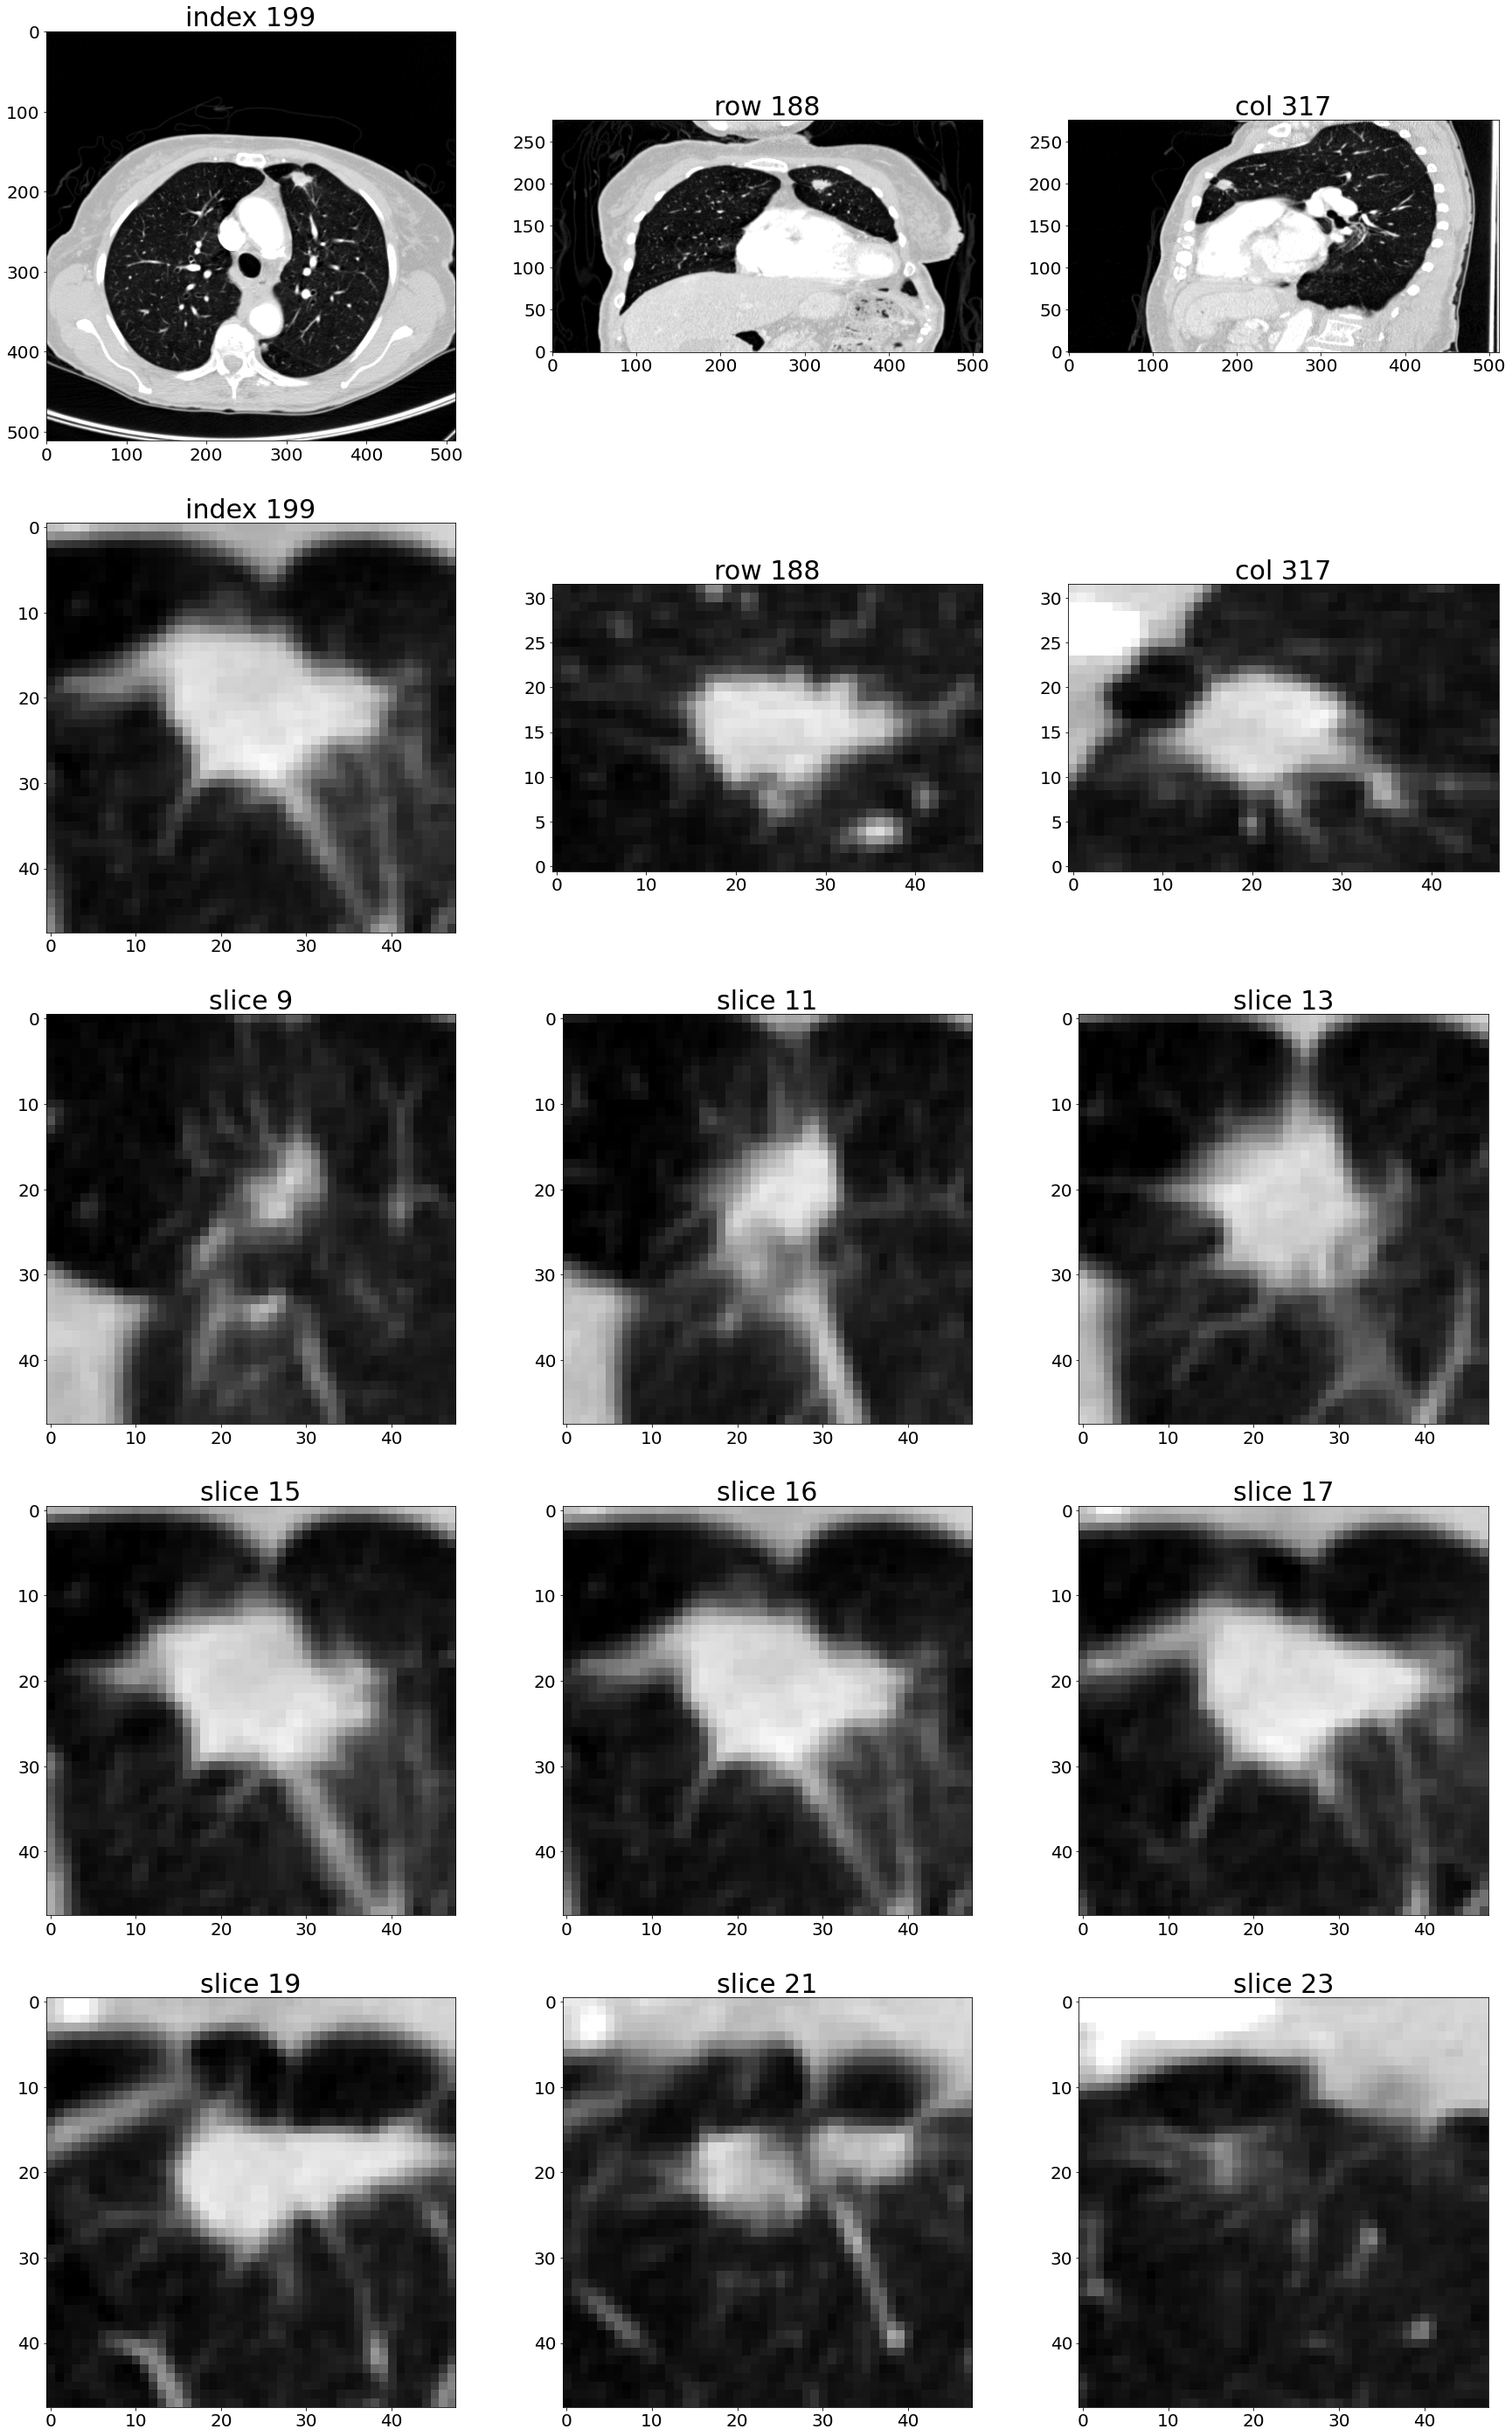

In [87]:
series_uid = positiveSample_list[11][2]
showCandidate(series_uid)

2021-01-23 15:36:17,198 INFO     pid:61 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7efcdd0a7438>: 1061 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 0 False [0]


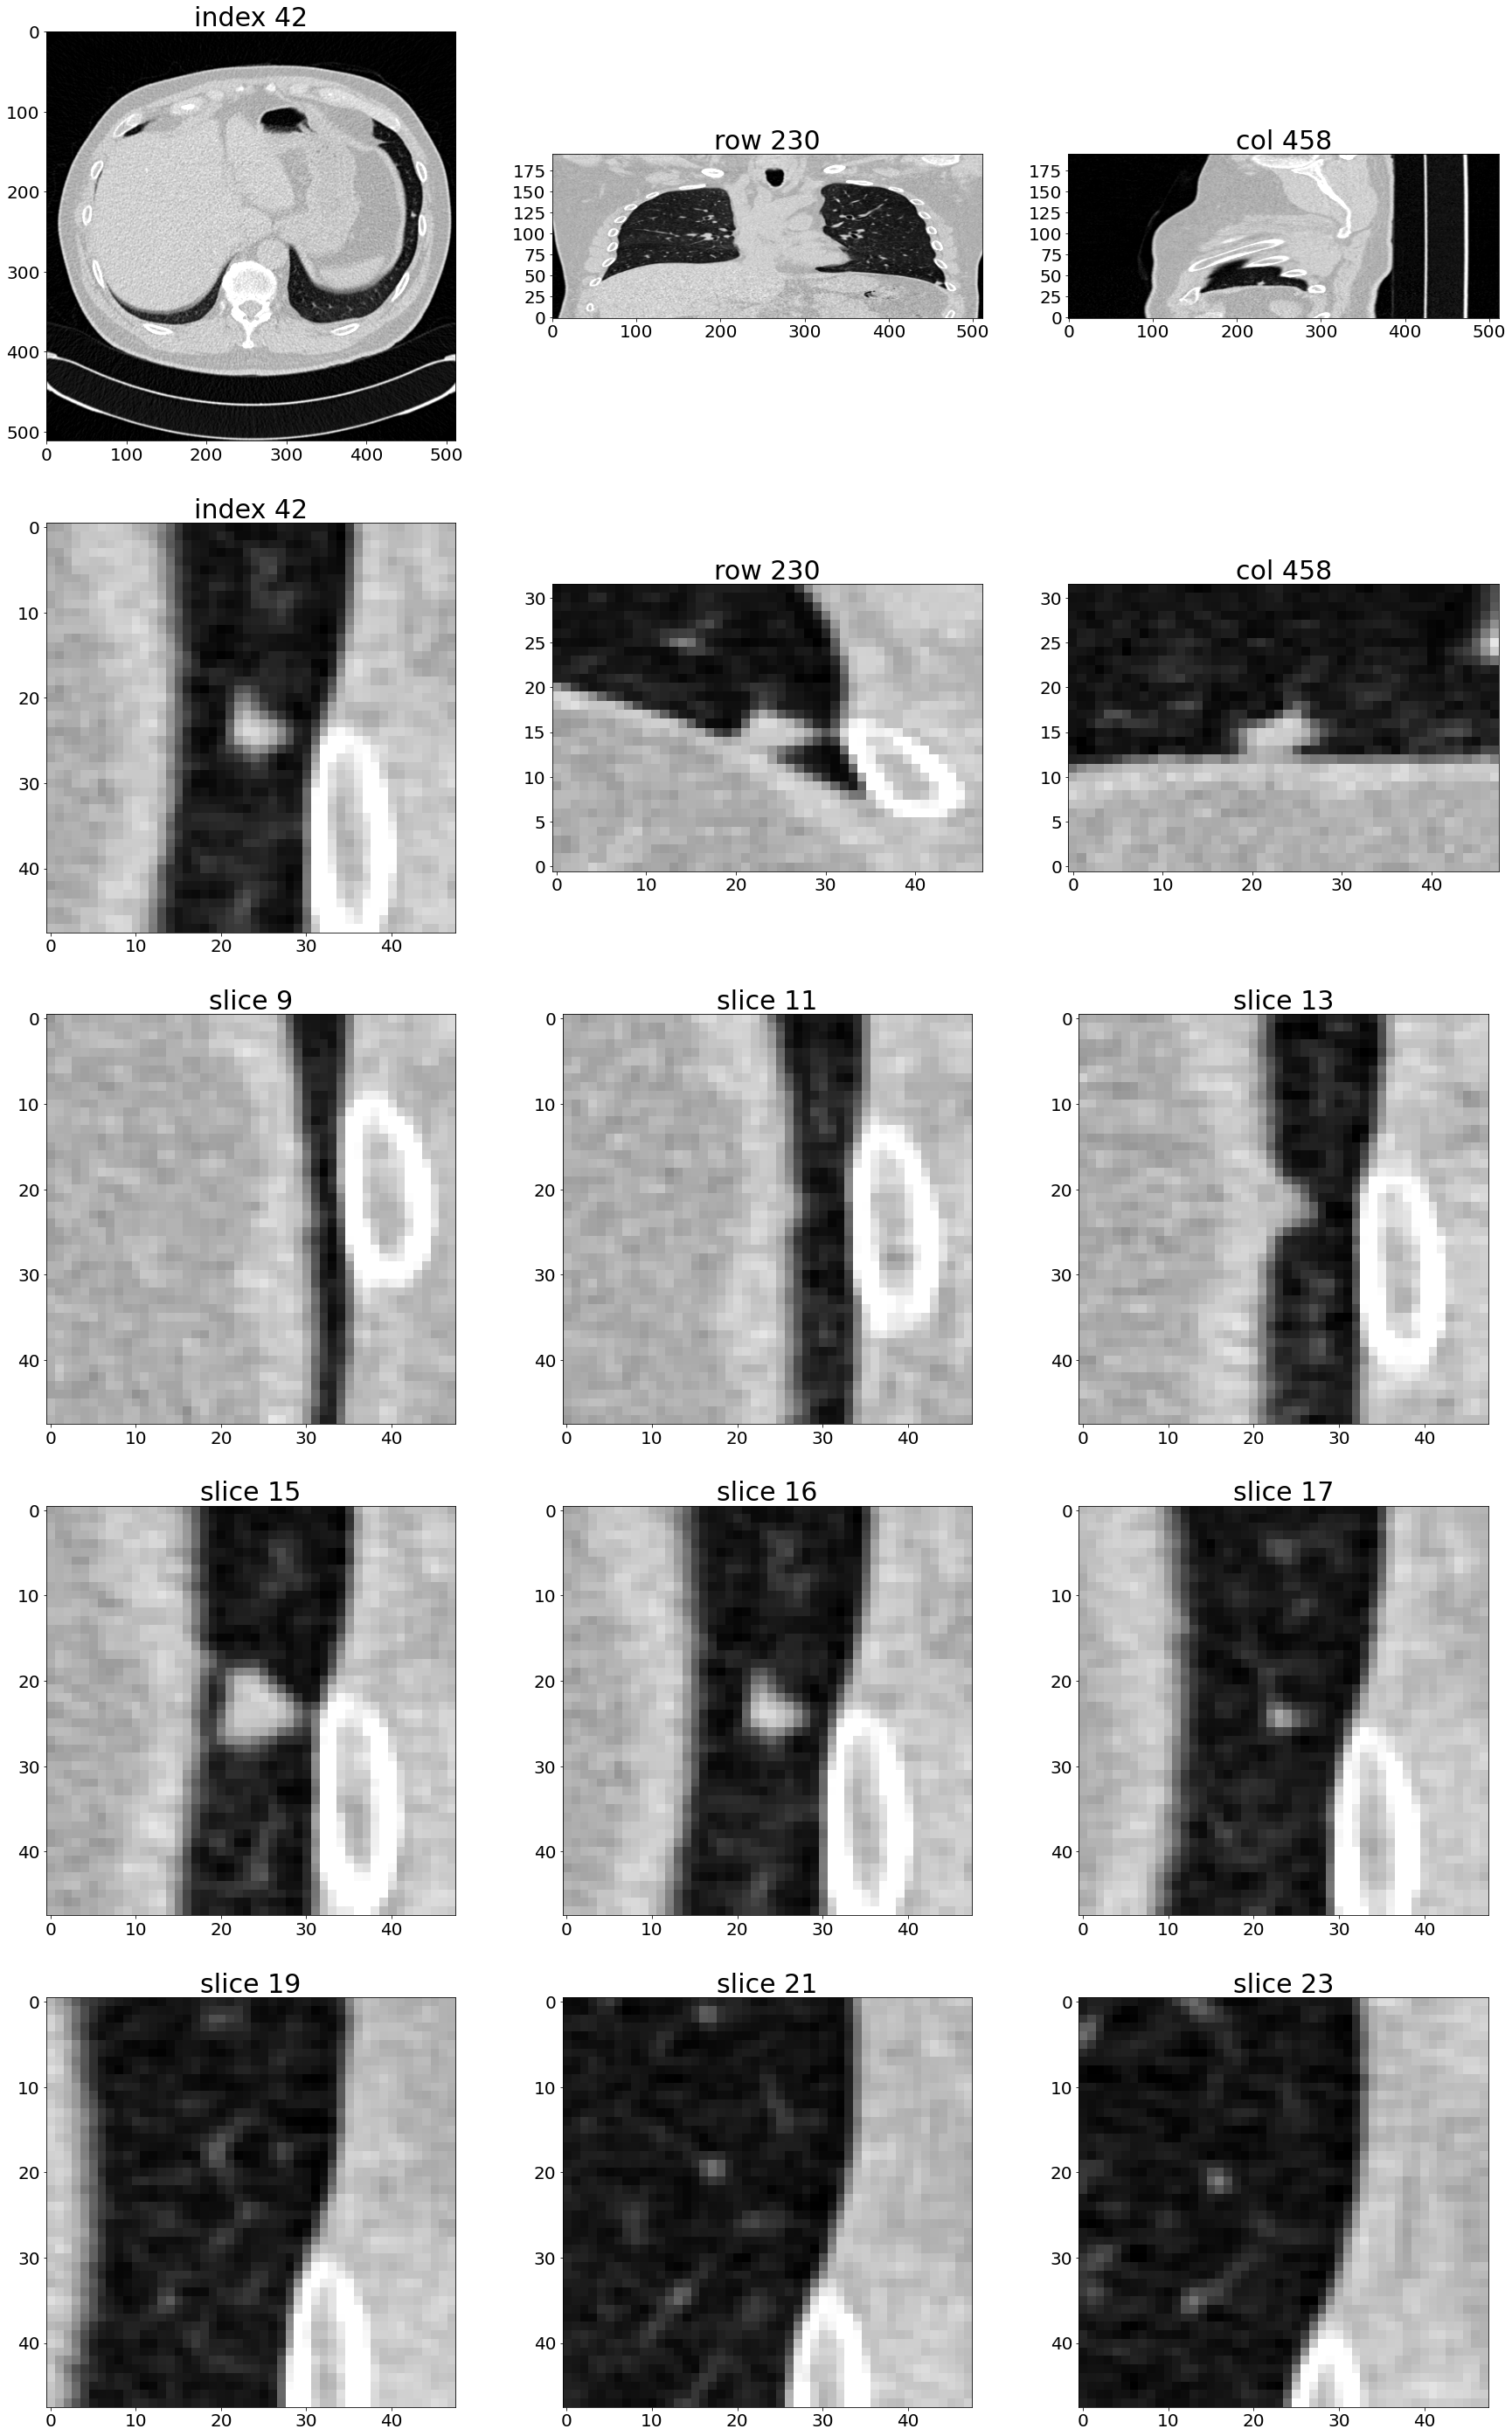

In [88]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(series_uid)

2021-01-23 15:36:22,151 INFO     pid:61 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7efcdd0a7e80>: 605 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 0 False [0]


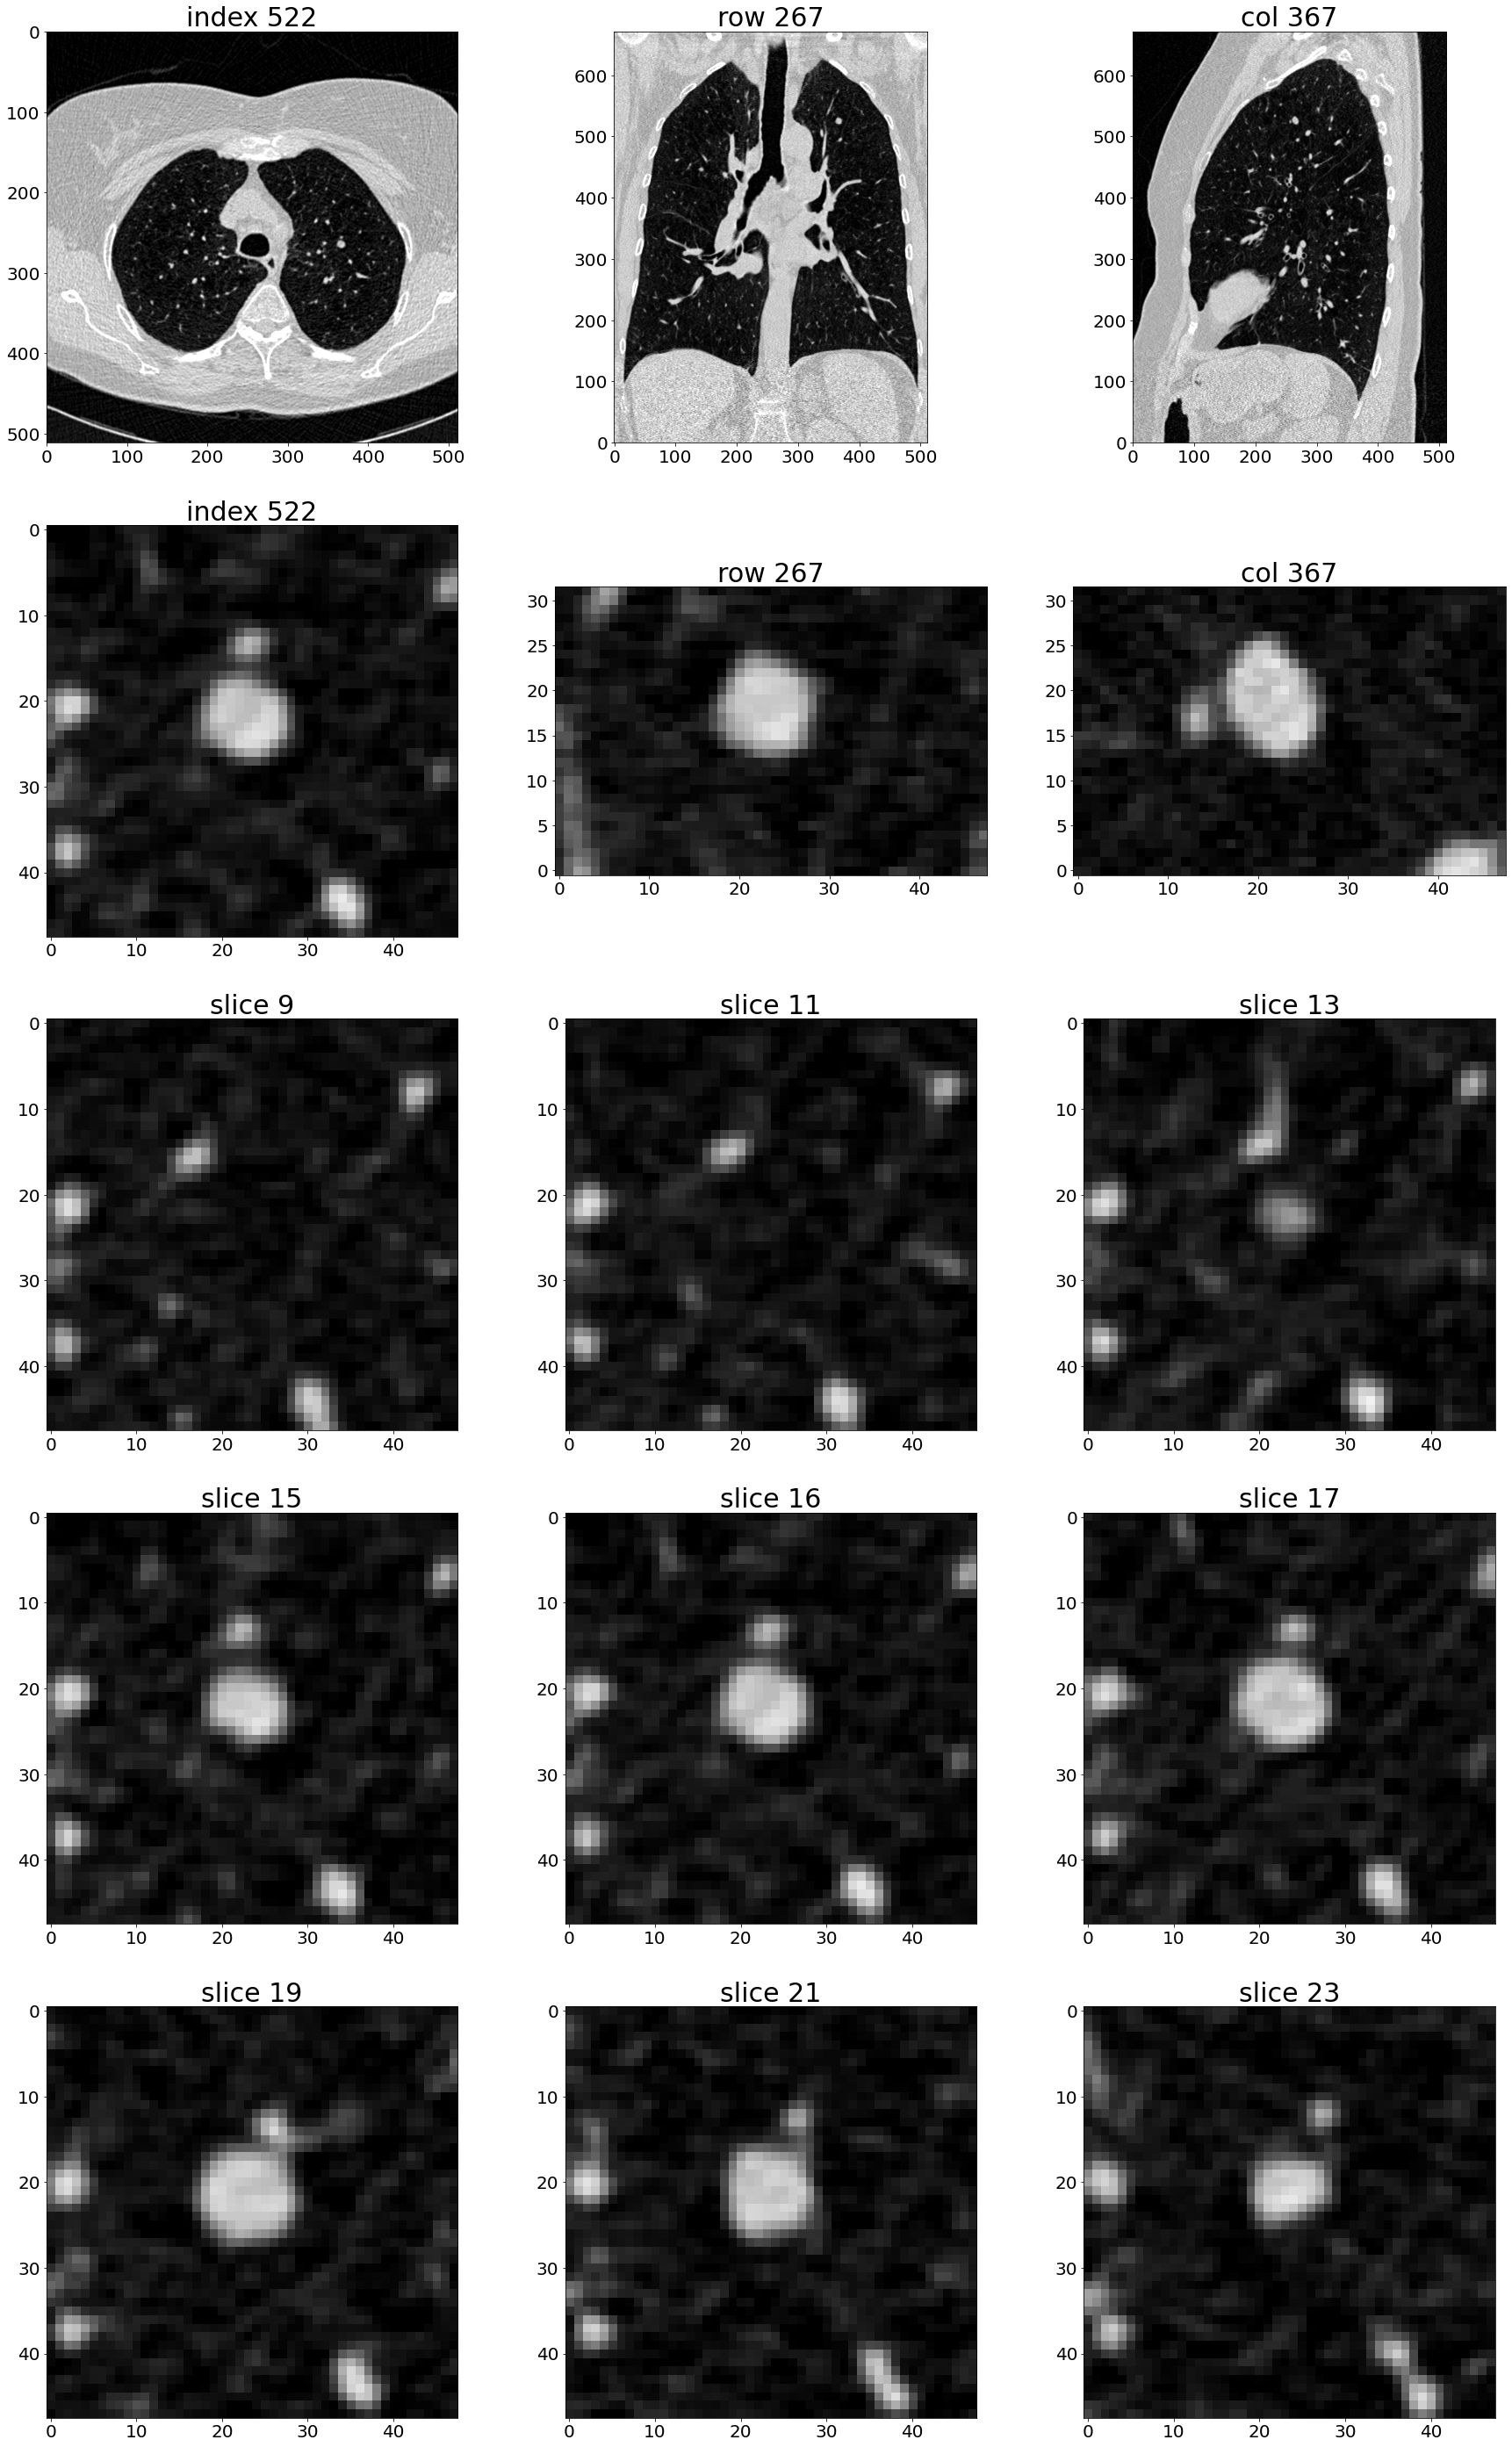

In [89]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
showCandidate(series_uid)

In [90]:
LunaDataset()[0]

2021-01-23 15:36:31,227 INFO     pid:61 p2ch10.dsets:173:__init__ <p2ch10.dsets.LunaDataset object at 0x7efcd3347198>: 56938 training samples


(tensor([[[[-673., -779., -869.,  ..., -868., -826., -840.],
           [-719., -778., -787.,  ..., -825., -778., -799.],
           [-766., -759., -672.,  ..., -794., -742., -784.],
           ...,
           [-705., -692., -733.,  ...,  225.,  322.,  393.],
           [-668., -655., -672.,  ...,  611.,  576.,  503.],
           [-637., -638., -650.,  ...,  576.,  426.,  323.]],
 
          [[-814., -844., -868.,  ..., -816., -818., -833.],
           [-874., -865., -839.,  ..., -815., -827., -844.],
           [-919., -885., -819.,  ..., -838., -827., -845.],
           ...,
           [-760., -750., -713.,  ...,   -5.,   11.,   -4.],
           [-717., -725., -676.,  ...,  108.,  110.,   61.],
           [-693., -692., -679.,  ...,  278.,  219.,  165.]],
 
          [[-951., -954., -947.,  ..., -872., -864., -858.],
           [-949., -953., -941.,  ..., -853., -846., -850.],
           [-928., -940., -920.,  ..., -827., -823., -833.],
           ...,
           [-698., -727., -761.

In [92]:
pip install ipyvolume

     |████████████████████████████████| 2.9MB 5.9MB/s 
     |████████████████████████████████| 1.1MB 43.5MB/s 
     |████████████████████████████████| 3.3MB 40.2MB/s 
     |████████████████████████████████| 276kB 38.5MB/s 


In [93]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)


/usr/local/lib/python3.6/dist-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [94]:
ct = getCt(series_uid)
ipv.quickvolshow(ct.hu_a, level=[0.25, 0.5, 0.9], opacity=0.1, level_width=0.1, data_min=-1000, data_max=1000)

/usr/local/lib/python3.6/dist-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/usr/local/lib/python3.6/dist-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2


# Note: the following visualization doesn't look very good.
It's only included here for completeness. 

In [95]:
import scipy.ndimage.morphology
def build2dLungMask(ct, mask_ndx, threshold_gcc = 0.7):
    dense_mask = ct.hu_a[mask_ndx] > threshold_gcc
    denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
    tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
    body_mask = scipy.ndimage.morphology.binary_fill_holes(tissue_mask)
    air_mask = scipy.ndimage.morphology.binary_fill_holes(body_mask & ~tissue_mask)

    lung_mask = scipy.ndimage.morphology.binary_dilation(air_mask, iterations=2)

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask


def build3dLungMask(ct):
    air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = mask_list = \
        [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]

    for mask_ndx in range(ct.hu_a.shape[0]):
        for i, mask_ary in enumerate(build2dLungMask(ct, mask_ndx)):
            mask_list[i][mask_ndx] = mask_ary

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask

In [100]:
from p2ch10.dsets import getCt
ct = getCt(series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = build3dLungMask(ct)


In [99]:
print("Happy Sugar Life")

Happy Sugar Life


In [ ]:
bones = ct.hu_a * (ct.hu_a > 1.5)
lungs = ct.hu_a * air_mask
ipv.figure()
ipv.pylab.volshow(bones + lungs, level=[0.17, 0.17, 0.23], data_min=100, data_max=900)
ipv.show()

/usr/local/lib/python3.6/dist-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/usr/local/lib/python3.6/dist-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
